In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os



In [60]:
cifar_fp_icarl_nme = []
cifar_fp_icarl_cnn = []
cifar_fp_lwf_cnn = []
cifar_fp_bic_nme = []

cifar_ours_lwf = []
cifar_ours_icarl_nme = []
cifar_ours_icarl_cnn = []
cifar_ours_icarl_nme = []
cifar_ours_icarl_cnn = []

In [61]:
dsads_fp_icarl_nme = [99.875,	97.625,	95.2765, 89.3865,	88.359,	85.194,	82.8105,	79.6875,	77.416,	76.3815]
dsads_fp_icarl_cnn = [99.9165,	97.208,	92.1245,	85.5625,	84.433,	80.944,	78.566,	74.8805,	73.422,	72.8265]
dsads_fp_lwf_cnn = [99.9165,	69.666,	46.4305,	30.5835,	23.232,	17.896,	16.363,	14.047,	12.811,	12.0565]
dsads_fp_bic_nme = [99.792,	97.749,	92.736,	86.958,	85.558,	81.5965,	78.679,	75.5415,	73.3845,	71.468]
dsads_fp_bic_cnn = [99.75,	97.625,	92.4575,	85.261,	85.2495,	82.0275,	76.5425,	74.287,	72.149,	70.1395]

dsads_ours_lwf = [99.875,	68.8545,	49.389,	33.458,	25.0075,	19.7095,	16.864,	15.089,	13.1435,	12.333]
dsads_ours_icarl_nme = [99.7085,	96.3125,	93.9865,	88.3125,	87.2425,	83.854,	81.2145,	79.7455,	77.236,	77.192]
dsads_ours_icarl_cnn = [99.875,	96.667,	92.167,	85.4165,	84.818,	79.513,	77.4935,	74.9115,	72.694,	72.7365]
dsads_ours_bic_nme = [99.667,	93.666,	94,	84.334,	83.334,	79.64,	73.762,	67.438,	69.092,	67.51]
dsads_ours_bic_cnn = [99.9585,	96.9785,	92.07,	84.7395,	83.3915,	80.2845,	74.071,	71.057,	69.464,	67.6225]

In [62]:
pamap_fp_lwf_cnn = [98.511,	69.985,	54.49,	44.3545,	40.023,	36.3395]
pamap_fp_icarl_nme = [98.607,	95.4885,	91.7805,	86.3215,	83.1715,	80.025]
pamap_fp_icarl_cnn = [98.511,	94.5975,	89.6315,	83.329,	79.2365,	77.518]
pamap_fp_bic_nme = [98.5585,	94.696,	89.814,	83.103,	79.6895,	76.3525]
pamap_fp_bic_cnn = [98.207,	95.1355,	89.6015,	81.851,	77.883,	77.551]

pamap_ours_lwf = [98.6035,	67.1725,	55.0345,	41.972,	35.699,	32.837]
pamap_ours_icarl_nme = [98.139,	94.671,	91.423,	85.2075,	82.8195,	79.9585]
pamap_ours_icarl_cnn = [98.6035,	94.5755,	89.0705,	81.9145,	80.0145, 77.8685]
pamap_ours_bic_nme = [98.0355,	94.304,	86.958,	79.82,	76.534,	74.67]
pamap_ours_bic_cnn = [98.407,	94.3035,	88.765,	81.55,	77.849,	75.605]

In [63]:
hapt_fp_lwf_cnn = [97.2275,	71.447,	55.859,	44.904,	35.65,	32.778]
hapt_fp_icarl_nme = [97.2185,	96.368,	93.265,	90.511,	87.1235,	85.7985]
hapt_fp_icarl_cnn = [97.2275,	96.125,	91.382,	88.611,	83.343,	82.98]
hapt_fp_bic_nme = [97.3415,	95.9915,	91.3175,	88.3865,	84.2105,	81.1315]
hapt_fp_bic_cnn = [97.2815,	95.8225,	91.2755,	87.9175,	83.5655,	80.8195]

hapt_ours_lwf = [97.0125,	73.5865,	53.7675,	39.3525,	31.106,	28.6475]
hapt_ours_icarl_nme = [96.7705,	96.154,	90.63,	89.6645,	85.593,	84.944]
hapt_ours_icarl_cnn = [97.0125,	95.805,	88.458,	87.432,	82.344,	82.562]
hapt_ours_bic_nme = [96.5225,	96.3815,	89.5675,	86.643,	81.3185,	78.7865]
hapt_ours_bic_cnn = [95.843,	96.01,	90.4005,	86.1635,	80.9215,	77.855]

## dsads

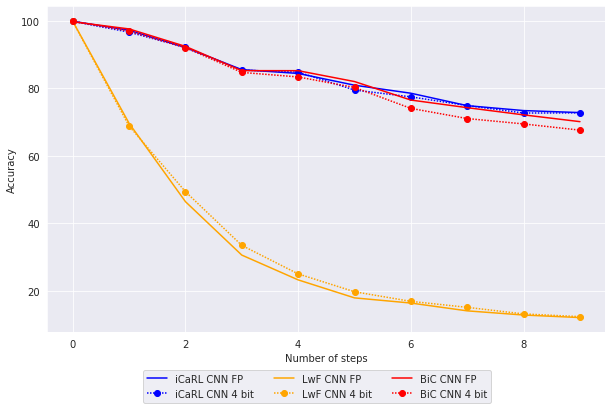

In [65]:
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(np.arange(len(dsads_fp_icarl_cnn)), dsads_fp_icarl_cnn,
            label='iCaRL CNN FP', color="blue")
    ax.plot(np.arange(len(dsads_ours_icarl_cnn)), dsads_ours_icarl_cnn,
            label='iCaRL CNN 4 bit', color="blue", marker='o', dashes=[1])
    ax.plot(np.arange(len(dsads_fp_lwf_cnn)), dsads_fp_lwf_cnn,
            label='LwF CNN FP', color="orange")
    ax.plot(np.arange(len(dsads_ours_lwf)), dsads_ours_lwf,
            label='LwF CNN 4 bit', color="orange", marker='o', dashes=[1])
    ax.plot(np.arange(len(dsads_fp_bic_cnn)), dsads_fp_bic_cnn,
            label='BiC CNN FP', color="red")
    ax.plot(np.arange(len(dsads_ours_bic_cnn)), dsads_ours_bic_cnn,
            label='BiC CNN 4 bit', color="red", marker='o', dashes=[1])
    ax.set_xlabel('Number of steps')
    ax.set_ylabel('Accuracy')
    
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=3)

## pamap

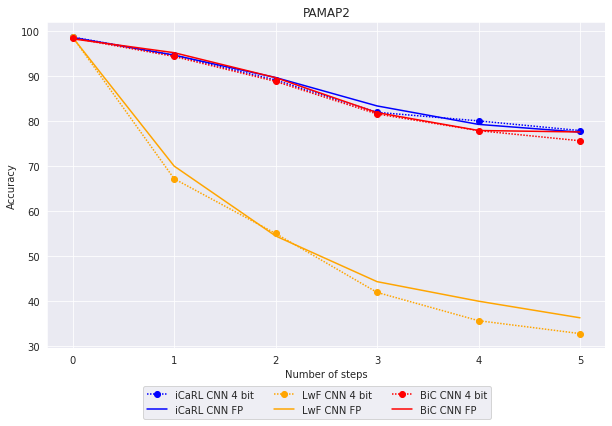

In [66]:
with sns.axes_style('darkgrid'):
        fig, ax = plt.subplots(figsize=(10, 6))
        
        ax.plot(np.arange(len(pamap_ours_icarl_cnn)), pamap_ours_icarl_cnn,
                label='iCaRL CNN 4 bit', color="blue", marker='o', dashes=[1])
        ax.plot(np.arange(len(pamap_fp_icarl_cnn)), pamap_fp_icarl_cnn,
                label='iCaRL CNN FP', color="blue")
        ax.plot(np.arange(len(pamap_ours_lwf)), pamap_ours_lwf,
                label='LwF CNN 4 bit', color="orange", marker='o', dashes=[1])
        ax.plot(np.arange(len(pamap_fp_lwf_cnn)), pamap_fp_lwf_cnn,
                label='LwF CNN FP', color="orange")
        ax.plot(np.arange(len(pamap_ours_bic_cnn)), pamap_ours_bic_cnn,
                label='BiC CNN 4 bit', color="red", marker='o', dashes=[1])
        ax.plot(np.arange(len(pamap_fp_bic_cnn)), pamap_fp_bic_cnn,
                label='BiC CNN FP', color="red")
        ax.set_xlabel('Number of steps')
        ax.set_ylabel('Accuracy')
        ax.set_title('PAMAP2')
        fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=3)

## hapt

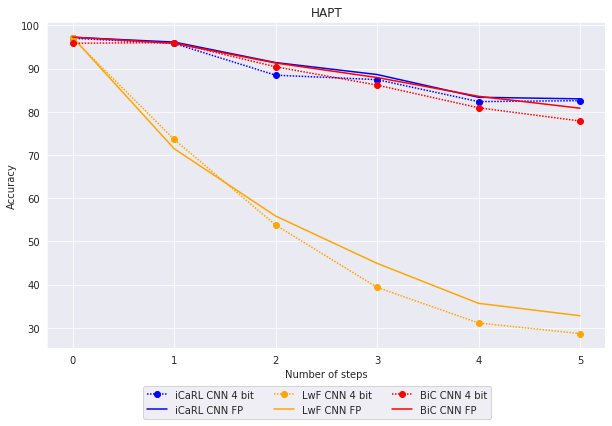

In [67]:
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(np.arange(len(hapt_ours_icarl_cnn)), hapt_ours_icarl_cnn,
            label='iCaRL CNN 4 bit', color="blue", marker='o', dashes=[1])
    ax.plot(np.arange(len(hapt_fp_icarl_cnn)), hapt_fp_icarl_cnn,
            label='iCaRL CNN FP', color="blue")
    ax.plot(np.arange(len(hapt_ours_lwf)), hapt_ours_lwf,
            label='LwF CNN 4 bit', color="orange", marker='o', dashes=[1])
    ax.plot(np.arange(len(hapt_fp_lwf_cnn)), hapt_fp_lwf_cnn,
            label='LwF CNN FP', color="orange")
    ax.plot(np.arange(len(hapt_ours_bic_cnn)), hapt_ours_bic_cnn,
            label='BiC CNN 4 bit', color="red", marker='o', dashes=[1])
    ax.plot(np.arange(len(hapt_fp_bic_cnn)), hapt_fp_bic_cnn,
            label='BiC CNN FP', color="red")
    ax.set_xlabel('Number of steps')
    ax.set_ylabel('Accuracy')
    ax.set_title('HAPT')
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=3)
    

# combined

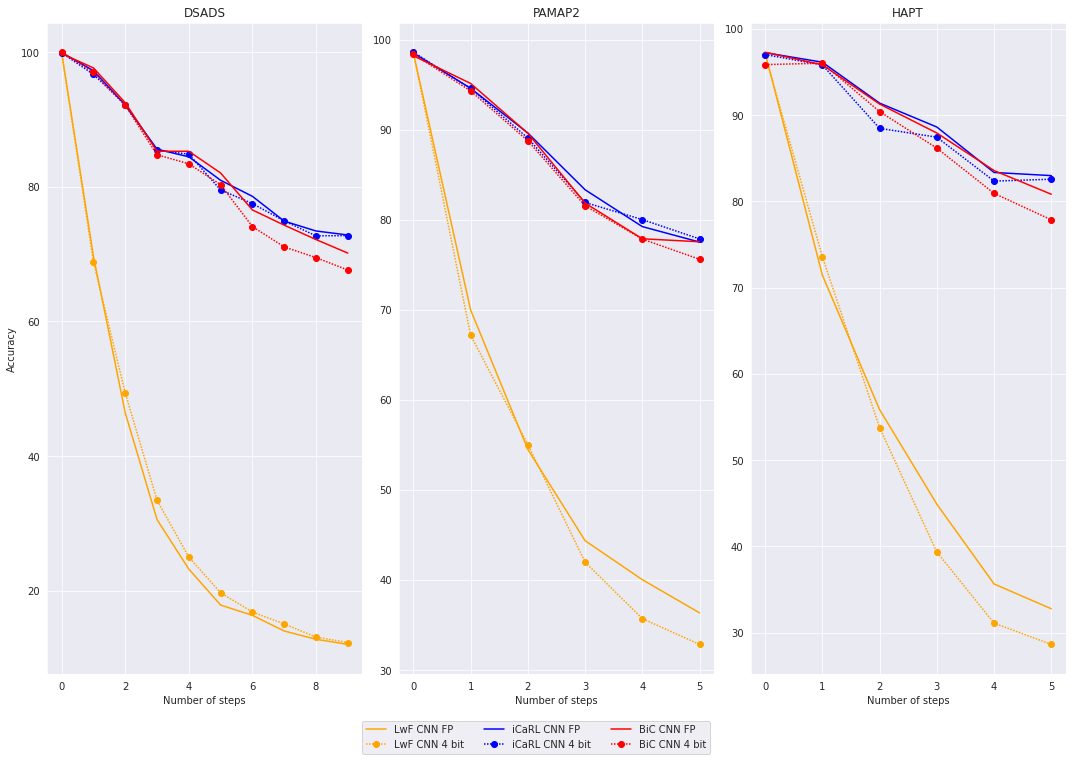

In [76]:
with sns.axes_style('darkgrid'):
    fig, axes = plt.subplots(1, 3, figsize=(15, 10))
    axes[0].plot(np.arange(len(dsads_fp_lwf_cnn)), dsads_fp_lwf_cnn,
                    label='LwF CNN FP', color="orange")
    axes[0].plot(np.arange(len(dsads_ours_lwf)), dsads_ours_lwf,
                    label='LwF CNN 4 bit', color="orange", marker='o', dashes=[1])
    axes[0].plot(np.arange(len(dsads_fp_icarl_cnn)), dsads_fp_icarl_cnn,
                    label='iCaRL CNN FP', color="blue")
    axes[0].plot(np.arange(len(dsads_ours_icarl_cnn)), dsads_ours_icarl_cnn,
                    label='iCaRL CNN 4 bit', color="blue", marker='o', dashes=[1])
    axes[0].plot(np.arange(len(dsads_fp_bic_cnn)), dsads_fp_bic_cnn,
                    label='BiC CNN FP', color="red")
    axes[0].plot(np.arange(len(dsads_ours_bic_cnn)), dsads_ours_bic_cnn,
                    label='BiC CNN 4 bit', color="red", marker='o', dashes=[1])
    axes[0].set_xlabel('Number of steps')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_title('DSADS')

    axes[1].plot(np.arange(len(pamap_ours_lwf)), pamap_ours_lwf,
                    label='LwF CNN 4 bit', color="orange", marker='o', dashes=[1])
    axes[1].plot(np.arange(len(pamap_fp_lwf_cnn)), pamap_fp_lwf_cnn,
                    label='LwF CNN FP', color="orange")
    axes[1].plot(np.arange(len(pamap_ours_icarl_cnn)), pamap_ours_icarl_cnn,
                    label='iCaRL CNN 4 bit', color="blue", marker='o', dashes=[1])
    axes[1].plot(np.arange(len(pamap_fp_icarl_cnn)), pamap_fp_icarl_cnn,
                    label='iCaRL CNN FP', color="blue")
    axes[1].plot(np.arange(len(pamap_ours_bic_cnn)), pamap_ours_bic_cnn,
                    label='BiC CNN 4 bit', color="red", marker='o', dashes=[1])
    axes[1].plot(np.arange(len(pamap_fp_bic_cnn)), pamap_fp_bic_cnn,
                    label='BiC CNN FP', color="red")
    axes[1].set_xlabel('Number of steps')
    #axes[1].set_ylabel('Accuracy')
    axes[1].set_title('PAMAP2')

    axes[2].plot(np.arange(len(hapt_ours_lwf)), hapt_ours_lwf,
                    label='LwF CNN 4 bit', color="orange", marker='o', dashes=[1])
    axes[2].plot(np.arange(len(hapt_fp_lwf_cnn)), hapt_fp_lwf_cnn,
                    label='LwF CNN FP', color="orange")
    axes[2].plot(np.arange(len(hapt_ours_icarl_cnn)), hapt_ours_icarl_cnn,
                    label='iCaRL CNN 4 bit', color="blue", marker='o', dashes=[1])
    axes[2].plot(np.arange(len(hapt_fp_icarl_cnn)), hapt_fp_icarl_cnn,
                    label='iCaRL CNN FP', color="blue")
    axes[2].plot(np.arange(len(hapt_ours_bic_cnn)), hapt_ours_bic_cnn,
                    label='BiC CNN 4 bit', color="red", marker='o', dashes=[1])
    axes[2].plot(np.arange(len(hapt_fp_bic_cnn)), hapt_fp_bic_cnn,
                    label='BiC CNN FP', color="red")
    axes[2].set_xlabel('Number of steps')
    #axes[2].set_ylabel('Accuracy')
    axes[2].set_title('HAPT')

    # add legen for overall fig
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.00), ncol=3)
    plt.tight_layout()
